# 1. Data loading

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

filename = 'NorthSeaData/FORCE_2020_train.csv' # nome do dado de entrada
df = pd.read_csv(filename) # leitura do dado de entrada

FileNotFoundError: [Errno 2] No such file or directory: 'FORCE_2020_train.csv'

In [2]:
### number feature (well log profiling) visualization
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [3]:
# indata 
training_data = df[['WELL', 
                    'DEPTH_MD', 
                    'RMED', 
                    'RDEP', 
                    'RHOB', 
                    'GR', 
                    'NPHI',
                    'DTC', 
                    'PEF', 
                    'FORCE_2020_LITHOFACIES_LITHOLOGY']].copy()

In [4]:
# indata to use 
df = df[['WELL', 
         'DEPTH_MD', 
         'RMED', 
         'RDEP', 
         'RHOB', 
         'GR', 
         'NPHI',
         'DTC', 
         'PEF', 
         'FORCE_2020_LITHOFACIES_LITHOLOGY']].copy()

In [5]:
df.columns

Index(['WELL', 'DEPTH_MD', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC', 'PEF',
       'FORCE_2020_LITHOFACIES_LITHOLOGY'],
      dtype='object')

In [6]:
# List the number of wells
for well in df['WELL'].unique():
    
    print(well)

15/9-13
15/9-15
15/9-17
16/1-2
16/1-6 A
16/10-1
16/10-2
16/10-3
16/10-5
16/11-1 ST3
16/2-11 A
16/2-16


In [7]:
# List of headers
plot_cols = ['WELL', 'DEPTH_MD','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI',
             'DTC', 'PEF','FORCE_2020_LITHOFACIES_LITHOLOGY']

In [8]:
df = df[plot_cols]

In [9]:
df.head()

,WELL,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF,FORCE_2020_LITHOFACIES_LITHOLOGY
0,15/9-13,494.528,1.611410,1.798681,1.884186,80.200851,NaN,161.131180,20.915468,65000
1,15/9-13,494.680,1.618070,1.795641,1.889794,79.262886,NaN,160.603470,19.383013,65000
2,15/9-13,494.832,1.626459,1.800733,1.896523,74.821999,NaN,160.173615,22.591518,65000
3,15/9-13,494.984,1.621594,1.801517,1.891913,72.878922,NaN,160.149429,32.191910,65000
4,15/9-13,495.136,1.602679,1.795299,1.880034,71.729141,NaN,160.128342,38.495632,65000


In [10]:
data_nan = df.copy()

In [11]:
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works

RMED 0
RDEP 1
RHOB 2
GR 3
NPHI 4
DTC 5
PEF 6
FORCE_2020_LITHOFACIES_LITHOLOGY 7


In [12]:
data_nan.describe()

,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF,FORCE_2020_LITHOFACIES_LITHOLOGY
count,133198.000000,133198.000000,133198.000000,133198.000000,133198.0,133198.000000,133198.000000,133198.000000,133198.0
mean,1792.944663,0.942627,1.944496,2.811221,4.0,4.688636,5.995773,6.757068,8.0
std,739.441515,0.232555,0.228962,0.391335,0.0,0.463053,0.064876,0.428856,0.0
min,415.261599,0.000000,1.000000,2.000000,4.0,4.000000,5.000000,6.000000,8.0
25%,1182.822400,1.000000,2.000000,3.000000,4.0,4.000000,6.000000,7.000000,8.0
50%,1747.524495,1.000000,2.000000,3.000000,4.0,5.000000,6.000000,7.000000,8.0
75%,2413.874901,1.000000,2.000000,3.000000,4.0,5.000000,6.000000,7.000000,8.0
max,3272.024000,1.000000,2.000000,3.000000,4.0,5.000000,6.000000,7.000000,8.0


# 2. Plotting the Data with and without NaN

In [13]:
grouped = data_nan.groupby('WELL')

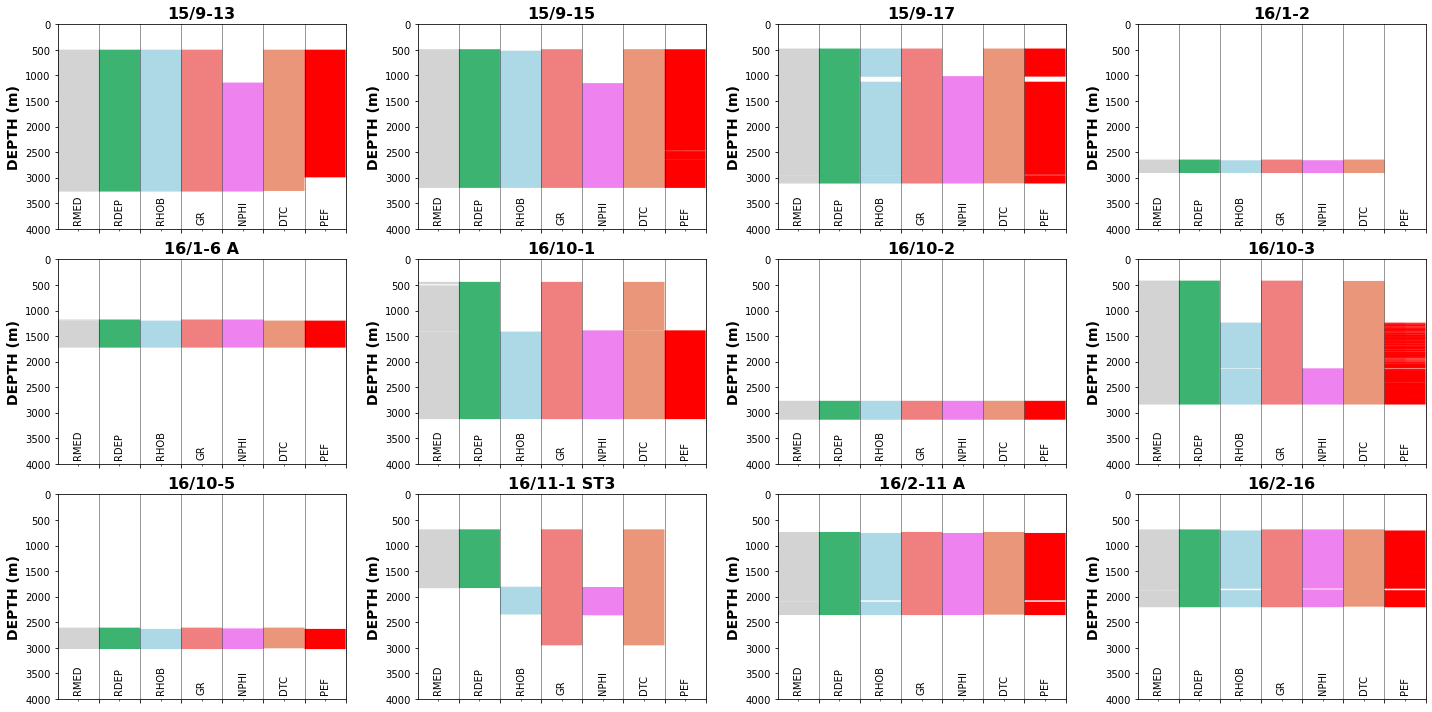

In [14]:
#Setup the labels we want to display on the x-axis
#labels = ['RMED','RDEP', 'RHOB','GR', 'NPHI', 'DTC'] # 6 features

#labels = ['CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF','DTC', 'SP','DTS','DRHO', 'RMIC','RXO'] # 13 features
labels = ['RMED', 'RDEP', 'RHOB', 'GR', 'NPHI','DTC', 'PEF']


#Setup the figure and the subplots
fig, axs = plt.subplots(3, 4, figsize=(20,10))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    #ax.set_xlim(0,5) # 6 features
    ax.set_xlim(0,6) # 9 features
    
    #Setup the depth range
    ax.set_ylim(4000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    #ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH_MD, 0, df.RMED, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.RDEP, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.RHOB, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.GR, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.NPHI, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.DTC, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.PEF, facecolor='red')
    #ax.fill_betweenx(df.DEPTH_MD, 6, df.SP, facecolor='thistle')
  
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-7)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.savefig('missingdata_northsea.pdf')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()


# 3. Select the headers to use in the in-data

In [15]:
training_data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [16]:
training_data

,WELL,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF,FACIES
0,15/9-13,494.528000,1.611410,1.798681,1.884186,80.200851,NaN,161.131180,20.915468,65000
1,15/9-13,494.680000,1.618070,1.795641,1.889794,79.262886,NaN,160.603470,19.383013,65000
2,15/9-13,494.832000,1.626459,1.800733,1.896523,74.821999,NaN,160.173615,22.591518,65000
3,15/9-13,494.984000,1.621594,1.801517,1.891913,72.878922,NaN,160.149429,32.191910,65000
4,15/9-13,495.136000,1.602679,1.795299,1.880034,71.729141,NaN,160.128342,38.495632,65000
...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.382444,5.339929,2.531374,127.456139,NaN,NaN,3.607062,30000
133194,16/2-16,2207.462396,5.651109,5.689734,2.526128,128.403305,NaN,NaN,3.609151,30000
133195,16/2-16,2207.614396,5.870602,5.496074,2.528934,127.829262,NaN,NaN,3.594580,30000
133196,16/2-16,2207.766396,5.756996,5.345353,2.527052,126.552277,NaN,NaN,3.534883,30000


# 4. Column Remapping / Renaming

In [17]:
lithology_numbers = {30000: 'Sandstone', # sandybrown
                     65030: 'Sandstone/Shale', #darkgoldenrod
                     65000: 'Shale', # olive
                     80000: 'Marl', #gainsboro
                     74000: 'Dolomite',
                     70000: 'Limestone',
                     70032: 'Chalk',
                     88000: 'Halite',
                     86000: 'Anhydrite',
                     99000: 'Tuff',
                     90000: 'Coal',
                     93000: 'Basement'}

second dictionary to tranform in integer

In [18]:
simple_lithology_numbers = {30000: 1,
                            65030: 2,
                            65000: 3,
                            80000: 4,
                            74000: 5,
                            70000: 6,
                            70032: 7,
                            88000: 8,
                            86000: 9,
                            99000: 10,
                            90000: 11,
                            93000: 12}

In [19]:
training_data['LITH'] = training_data['FACIES'].map(lithology_numbers)

In [20]:
training_data['LITH_SI'] = training_data['FACIES'].map(simple_lithology_numbers)

# 5. View the number of samples of the whole data

1     15794
2      6573
3     82390
4      4968
5       188
6     11912
7      5129
8      4314
9       374
10     1498
11       58
Name: LITH_SI, dtype: int64


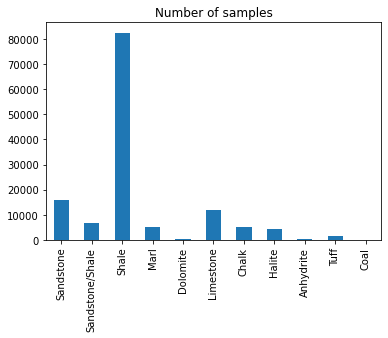

In [21]:
#plot the count of Facies
training_data['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(training_data['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,11,1)
plt.title('Number of samples')
plt.xticks(X_ind,['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Dolomite',
                  'Limestone',
                  'Chalk',
                  'Halite',
                  'Anhydrite',
                  'Tuff',
                  'Coal'])
plt.show()

# 6. Crossplot RHOB and NPHI (whole data)

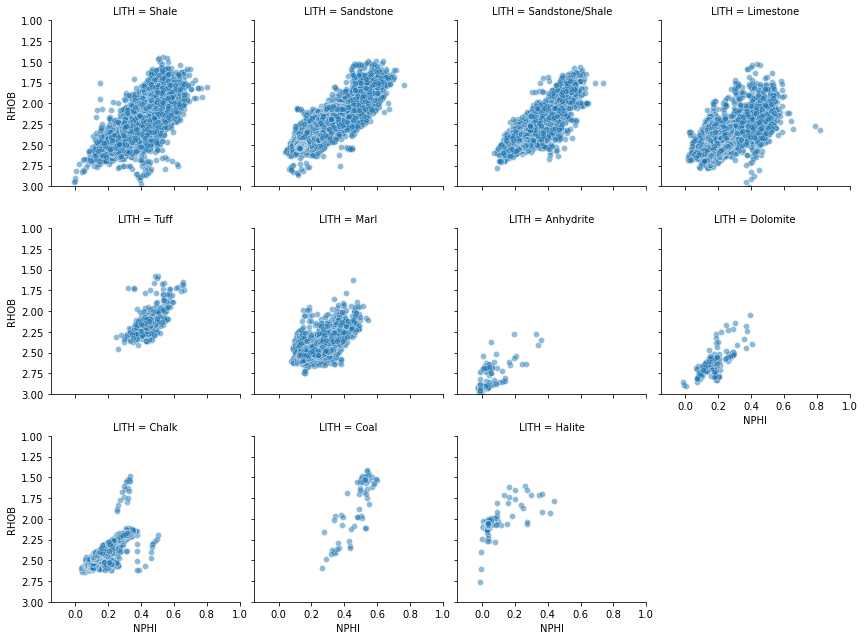

In [22]:
import seaborn as sns

g = sns.FacetGrid(training_data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
plt.show()

In [23]:
# remove NaN
training_data.dropna(inplace=True)

In [24]:
for well in training_data['WELL'].unique():
    
    print(well)

15/9-13
15/9-15
15/9-17
16/1-6 A
16/10-1
16/10-2
16/10-3
16/10-5
16/2-11 A
16/2-16


# 7. sorting out the blind test well

In [25]:
blind = training_data[training_data['WELL'] == '16/2-16'] #seleciona um poço apenas do dado
training_data = training_data[training_data['WELL'] != '16/2-16'] #remove o poço do dado
blind

,WELL,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF,FACIES,LITH,LITH_SI
123313,16/2-16,705.550396,1.340541,1.364968,2.125565,122.600769,0.472988,157.843994,4.017347,65000,Shale,3
123314,16/2-16,705.702396,1.344673,1.366519,2.126764,126.172905,0.476745,157.064499,3.816923,65000,Shale,3
123315,16/2-16,705.854396,1.355193,1.377351,2.131069,131.125244,0.459273,156.237564,3.770154,65000,Shale,3
123316,16/2-16,706.006396,1.366960,1.377473,2.140570,129.771545,0.444680,155.374191,3.732529,65000,Shale,3
123317,16/2-16,706.158396,1.385934,1.404746,2.151072,123.866241,0.428803,154.711121,3.577061,65000,Shale,3
...,...,...,...,...,...,...,...,...,...,...,...,...
133119,16/2-16,2196.062396,5.016001,4.727455,2.537510,132.450317,0.112312,70.126060,3.663386,30000,Sandstone,1
133120,16/2-16,2196.214396,4.574865,4.421765,2.526997,131.869812,0.116130,70.316216,3.629687,30000,Sandstone,1
133121,16/2-16,2196.366396,4.761734,4.535498,2.520570,127.004021,0.120230,70.462158,3.615547,30000,Sandstone,1
133122,16/2-16,2196.518396,5.035505,4.870131,2.523459,124.698349,0.126182,70.337593,3.594654,30000,Sandstone,1


In [26]:
training_data['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-6 A', '16/10-1', '16/10-2',
       '16/10-3', '16/10-5', '16/2-11 A'], dtype=object)

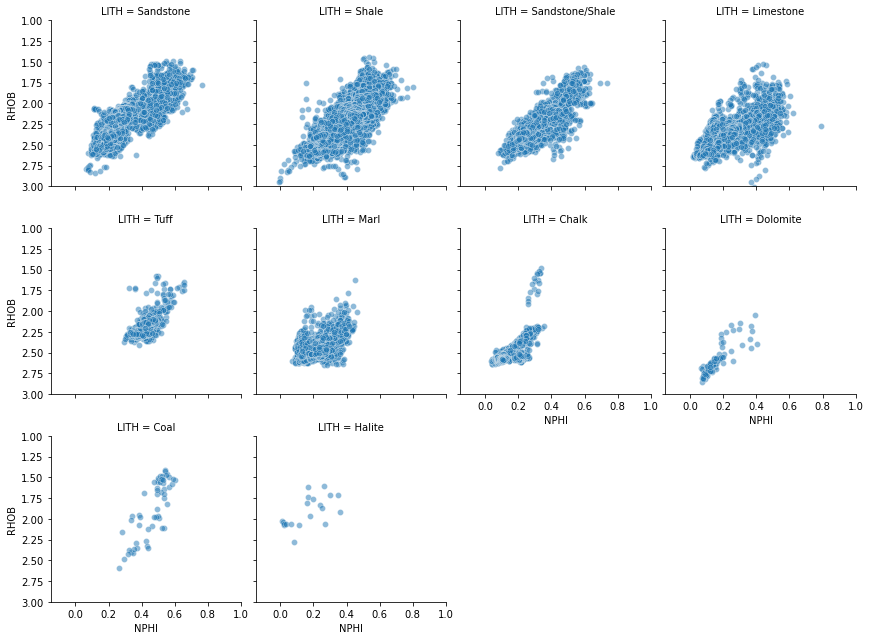

In [27]:
import seaborn as sns

g = sns.FacetGrid(training_data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
plt.show()

Two lithofacoes are exluded from data after dropping NaN.

1     1237
2      264
3     5670
4      905
6     1277
9       75
10     168
Name: LITH_SI, dtype: int64


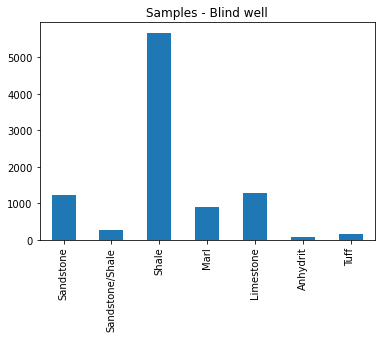

In [28]:
#plot the count of Facies
blind['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(blind['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,7,1)
plt.title('Samples - Blind well')
plt.xticks(X_ind,['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Limestone',
                  'Anhydrit','Tuff'])
plt.show()

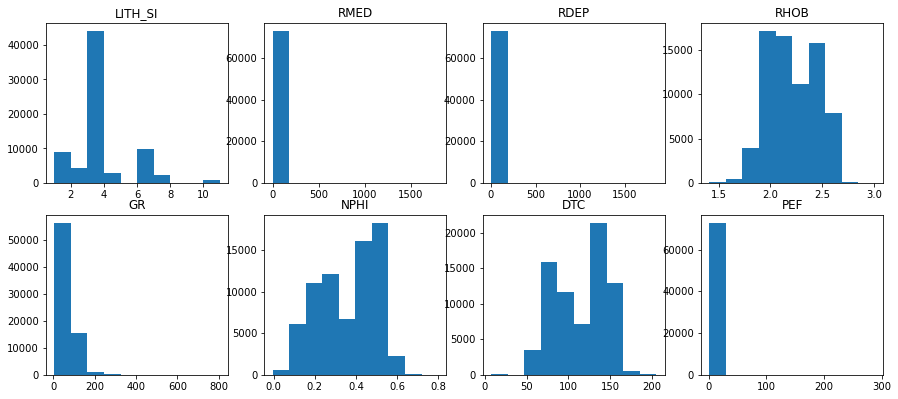

In [29]:
#['WELL', 'DEPTH_MD', 'RDEP', 'RHOB','GR', 'NPHI', 'PEF', 'DTC','SP']
#col_list = ['LITH_SI','RDEP', 'RHOB','GR', 'NPHI', 'PEF', 'DTC','SP']

col_list = ['LITH_SI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI','DTC', 'PEF']



plt.figure(figsize=(15,10))
i=0
for col in col_list:
    i+=1
    plt.subplot(3,4,i)
    plt.hist(training_data[col])
    plt.title(col)
plt.show()

1      8837
2      4314
3     44151
4      2810
5        98
6      9714
7      2259
8        20
10      866
11       56
Name: LITH_SI, dtype: int64


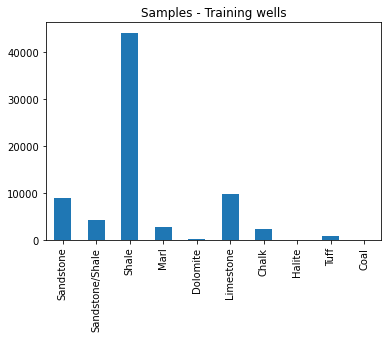

In [30]:
#plot the count of Facies
training_data['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(training_data['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,10,1)
plt.title('Samples - Training wells')
plt.xticks(X_ind,['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Dolomite',
                  'Limestone',
                  'Chalk',
                  'Halite',
                  'Tuff',
                  'Coal'])
plt.show()

# 8. Prepare data for modeling and blind test well


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report

In [32]:
features = ['RMED', 'RDEP', 'RHOB', 'GR', 'NPHI','DTC', 'PEF']



y = training_data['LITH_SI']
X = training_data[features]

In [33]:
### Data for modelling

#scaler = StandardScaler().fit(X)
#X_stnd = scaler.transform(X)

# standarization of data for SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X.corr()

,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF
RMED,1.000000,0.085010,0.093345,-0.063677,-0.134424,-0.120911,0.012963
RDEP,0.085010,1.000000,0.040408,-0.031926,-0.070180,-0.070503,0.046494
RHOB,0.093345,0.040408,1.000000,-0.128773,-0.857182,-0.859955,0.118039
GR,-0.063677,-0.031926,-0.128773,1.000000,0.384804,0.337936,-0.095782
NPHI,-0.134424,-0.070180,-0.857182,0.384804,1.000000,0.902656,-0.165047
DTC,-0.120911,-0.070503,-0.859955,0.337936,0.902656,1.000000,-0.203939
PEF,0.012963,0.046494,0.118039,-0.095782,-0.165047,-0.203939,1.000000


In [36]:
### Blind test well

y_blind = blind['LITH_SI']
X_blind = blind[features]
X_blind_stnd = sc.transform(X_blind)

In [37]:
#Plot loss and accuracy

import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mae']), label='Train')
    plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Val')
    plt.legend()
    plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
    plt.figure()
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values [1000$]')
    plt.ylabel('Predictions [1000$]')
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    _ = plt.plot([-100, 100],[-100,100])

    plt.figure()
    error = test_predictions - test_labels
    plt.hist(error, bins = 50)
    plt.xlabel("Prediction Error [1000$]")
    _ = plt.ylabel("Count")

In [38]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    

    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 9. Parameter optimization and classifier training

Modeling algorithms:
1. SVM
2. Gradient boosting
3. Random forest
4. KNN

In [39]:
from sklearn.svm import SVC # To use Support Vector Machine
from sklearn import ensemble # To use Gradient Boosting and Random forest
from sklearn.neighbors import KNeighborsClassifier # To use KNN
from sklearn.metrics import f1_score


### 9.1 SVM: Parameter optimiztion

In [40]:

# c_list = [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
# #gamma_list = [0.0001]
# i = 0
# plt.figure(figsize=(15,10))

# for gamma_value in gamma_list:
#     i = i + 1
#     scores = list()
#     score_stds = list()
#     score_tests = list()
#     #print('interations gamma_list =',i)
#     j = 0
#     for c_value in c_list:
        
#         j = j + 1
#         print('interations c_list =',j)
        
#         clf_cv = SVC(C=c_value, gamma=gamma_value)
        
#         cv_score = cross_val_score(clf_cv, X_train, y_train)
        
#         scores.append(np.mean(cv_score))
#         score_stds.append(np.std(cv_score))
#         clf_cv.fit(X_train, y_train)
        
#         score_test = clf_cv.score(X_test, y_test)
#         score_tests.append(score_test)
    
#     plt.subplot(2,3,i)
#     plt.semilogx(c_list, scores, label='Train error')
#     plt.semilogx(c_list, score_tests, label='Cross-validation error')
#     #plt.semilogx(c_list, np.array(scores)+np.array(score_stds), 'b--')
#     #plt.semilogx(c_list, np.array(scores)+-np.array(score_stds), 'b--')
#     plt.title('Gamma = {}'.format(gamma_value))
#     plt.xlabel('C values')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)

# plt.show()

SVM classifier training

In [41]:
clf = SVC(C=10, gamma=1)
clf.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [42]:
training_features = ['Ss',
                  'Ss/Sh',
                  'Sh',
                  'M',
                  'D',
                  'L',
                  'Ch',
                  'H',
                  'T',
                  'C']

In [43]:
list_blind_full = ['Ss',
                  'Ss/Sh',
                  'Sh',
                  'M',
                  'L',
                  'Ch',
                  'A',
                  'T',
                  'C']

              precision    recall  f1-score   support

           1       0.88      0.84      0.86      3571
           2       0.69      0.61      0.64      1652
           3       0.93      0.98      0.95     17693
           4       0.80      0.72      0.76      1147
           5       0.70      0.49      0.58        39
           6       0.85      0.85      0.85      3880
           7       0.78      0.59      0.67       873
           8       1.00      0.50      0.67        12
          10       0.76      0.41      0.53       362
          11       0.81      0.62      0.70        21

    accuracy                           0.89     29250
   macro avg       0.82      0.66      0.72     29250
weighted avg       0.89      0.89      0.89     29250

Normalized confusion matrix


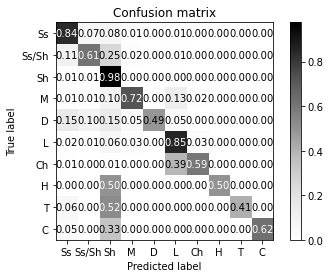

In [44]:

pred_test = clf.predict(X_test)
print(classification_report(y_test, pred_test))
cm_test_SVM = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm_test_SVM, training_features, normalize=True)

In [45]:
microF1_test_SVM = f1_score(y_test, pred_test, average='micro')
print('Test Macro f1 score:', microF1_test_SVM)

Test Macro f1 score: 0.892


                 precision    recall  f1-score   support

      Sandstone       0.77      0.45      0.57      1237
Sandstone/Shale       0.18      0.31      0.23       264
          Shale       0.81      0.99      0.89      5670
           Marl       0.59      0.38      0.46       905
      Limestone       0.89      0.59      0.71      1277
          Chalk       0.00      0.00      0.00         0
      Anhydrite       0.00      0.00      0.00        75
           Tuff       0.29      0.01      0.02       168
           Coal       0.00      0.00      0.00         0

       accuracy                           0.76      9596
      macro avg       0.39      0.30      0.32      9596
   weighted avg       0.76      0.76      0.74      9596

Normalized confusion matrix


C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_3592/1451807352.py:15: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


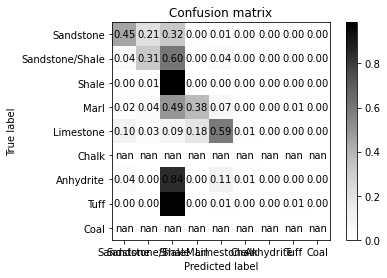

In [46]:
pred_blind = clf.predict(X_blind_stnd)
print(classification_report(y_blind, pred_blind, target_names=list_blind_full,zero_division=0))
cm_SVM = confusion_matrix(y_blind, pred_blind)
plot_confusion_matrix(cm_SVM, list_blind_full, normalize=True)

In [47]:
# for i_well in range(0,10):
    
#     aux_pred_svm = clf.predict(X_blind_stnd[i_well])
#     microF1_blind_SVM = f1_score(y_blind[i_well], aux_pred_svm, average='micro')
#     print('Blind micro f1 score:', microF1_blind_SVM)
aux_pred_svm = clf.predict(X_blind_stnd)
microF1_blind_SVM = f1_score(y_blind, aux_pred_svm, average='micro')
print('Blind micro f1 score:', microF1_blind_SVM)

Blind micro f1 score: 0.7640683618174239


### 9.2 Gradient boosting (GB): Parameter optimiztion

In [48]:
# why do not fit and transform  GRADIENT BOOST
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [49]:
# loss_list = ['deviance']
# max_depths = [2,3,4,5,6]

# i = 0
# plt.figure(figsize=(15,5))


# for los in loss_list:
    
#     i = i + 1
#     scores = list()
#     score_tests = list()

#     for depth in max_depths:
        
#         params = {'loss': los, ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
#                   'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
#                   'n_estimators': 500, ##  number of iterations, int, default=100
#                   'max_depth': depth, ##  int, default=3
#                   'subsample': 1, ## float, default=1.0
#                   'min_samples_split': 2 ## int or float, default=2
#                  }
#         clf_cv = ensemble.GradientBoostingClassifier(**params)
        
#         # Train data
#         clf_cv.fit(X1_train, y1_train)
#         cv_score = clf_cv.score(X1_train, y1_train)
#         scores.append(np.mean(cv_score))
        
#         # Test data
#         score_test = clf_cv.score(X1_test, y1_test)
#         score_tests.append(score_test)
    
#     plt.subplot(1,2,i)
#     plt.plot(max_depths, scores, 'o-', color='b', label='Train')
#     plt.plot(max_depths, score_tests, 'o-', color='r', label='Test')
#     plt.legend()
#     plt.title('Loss = {}'.format(los))
#     plt.xlabel('Max depth')
#     plt.ylabel('Accuracy')
    
    
#     #ax.semilogx(C_range, cv_errors, label='CV error')
#     #ax.semilogx(C_range, train_errors, label='Train error')
    
#     plt.ylim(0,1.1)

# plt.show()

How you could see, there is convergen with 4 deepths

In [50]:
# learning_rates = [0.001, 0.01, 0.1, 0.2, 0.4]
# n_estimators_list = [100, 500, 1000]

# i = 0
# plt.figure(figsize=(15,5))

# for est in n_estimators_list:
#     i = i + 1
#     scores = list()
#     score_tests = list()
    
#     for rate in learning_rates:
#         params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
#                   'learning_rate': rate, ##  learning_ratefloat, default=0.1
#                   'n_estimators': est, ##  number of iterations, int, default=100
#                   'max_depth': 4, ##  int, default=3
#                   'subsample': 1, ## float, default=1.0
#                   'min_samples_split': 2 ## int or float, default=2
#                   }
#         clf_cv = ensemble.GradientBoostingClassifier(**params)
#         clf_cv.fit(X1_train, y1_train)
#         cv_score = clf_cv.score(X1_train, y1_train)
#         scores.append(np.mean(cv_score))
#         score_test = clf_cv.score(X1_test, y1_test)
#         score_tests.append(score_test)
        
#     plt.subplot(1,3,i)
#     plt.semilogx(learning_rates, scores, 'o-', color='b', label='Train')
#     plt.semilogx(learning_rates, score_tests, 'o-', color='r', label='Test')
#     plt.legend()
#     plt.title('N estimators = {}'.format(est))
#     plt.xlabel('learning rate')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)

# plt.show()

N_estimators =500 and learning rate = 0.1

In [51]:
# subsamples = [0.2, 0.6, 1]
# n_estimators_list = [500, 1000, 2000]

# i = 0
# plt.figure(figsize=(15,5))

# for est in n_estimators_list:
    
#     i = i + 1
#     scores = list()
#     score_tests = list()
    
#     for sub in subsamples:
        
#         params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
#                   'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
#                   'n_estimators': est, ##  number of iterations, int, default=100
#                   'max_depth': 5, ##  int, default=3
#                   'subsample': sub, ## float, default=1.0
#                   'min_samples_split': 2 ## int or float, default=2
#                   }
        
#         clf_cv = ensemble.GradientBoostingClassifier(**params)
#         clf_cv.fit(X_train, y_train)
#         cv_score = clf_cv.score(X_train, y_train)
        
#         scores.append(np.mean(cv_score))
#         score_test = clf_cv.score(X_test, y_test)
#         score_tests.append(score_test)
        
        
#     plt.subplot(1,3,i)
#     plt.plot(subsamples, scores, 'o-', color='b', label='Train')
#     plt.plot(subsamples, score_tests, 'o-', color='r', label='Test')
#     plt.legend()
#     plt.title('n_estimators = {}'.format(est))
#     plt.xlabel('sub samples')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)

# plt.show()

Based on the accuracy plot, max_depth=4, learning_rate=0.1, n_estimators=500, subsample=0.6

Gradient Boosting classifier training

              precision    recall  f1-score   support

           1       0.86      0.83      0.84      3571
           2       0.66      0.57      0.62      1652
           3       0.93      0.97      0.95     17693
           4       0.74      0.66      0.70      1147
           5       0.45      0.33      0.38        39
           6       0.85      0.84      0.84      3880
           7       0.78      0.66      0.72       873
           8       1.00      0.58      0.74        12
          10       0.60      0.43      0.50       362
          11       0.50      0.48      0.49        21

    accuracy                           0.88     29250
   macro avg       0.74      0.64      0.68     29250
weighted avg       0.88      0.88      0.88     29250

Normalized confusion matrix


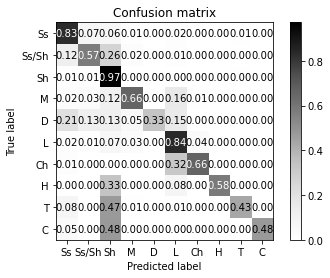

In [52]:
#target_list_gb = ['Sandstone',
 #              'Sandstone/Shale',
  #             'Shale','Marl',
   #            'Dolomite',
    #           'Limestone',
     #          'Chalk',
      #         'Tuff']

params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
          'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
          'n_estimators': 500, ##  number of iterations, int, default=100
          'max_depth': 3, ##  int, default=3
          'subsample': 1, ## float, default=1.0
          'min_samples_split': 2 ## int or float, default=2
          }
clf_GB = ensemble.GradientBoostingClassifier(**params)
clf_GB.fit(X1_train, y1_train)
preds_GB = clf_GB.predict(X1_test)

print(classification_report(y1_test, preds_GB))
cm_test_GB = confusion_matrix(y1_test, preds_GB)
plot_confusion_matrix(cm_test_GB, training_features, normalize=True)

In [53]:
microF1_test_gb = f1_score(y1_test, preds_GB, average='micro')
print('Test Micro f1 score:', microF1_test_gb)

Test Micro f1 score: 0.8845811965811966


C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-p

              precision    recall  f1-score   support

           1       0.81      0.46      0.58      1237
           2       0.14      0.24      0.17       264
           3       0.81      0.99      0.89      5670
           4       0.64      0.34      0.45       905
           5       0.00      0.00      0.00         0
           6       0.90      0.62      0.74      1277
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        75
          10       0.43      0.04      0.07       168

    accuracy                           0.77      9596
   macro avg       0.41      0.30      0.32      9596
weighted avg       0.77      0.77      0.75      9596

Normalized confusion matrix


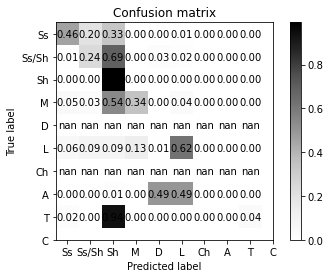

In [54]:
list_blind_full = ['Ss',
                  'Ss/Sh',
                  'Sh',
                  'M',
                   'D',
                  'L',
                  'Ch',
                  'A',
                  'T',
                  'C']

pred_GB_blind = clf_GB.predict(X_blind)
print(classification_report(y_blind, pred_GB_blind))
cm_GB = confusion_matrix(y_blind, pred_GB_blind)
plot_confusion_matrix(cm_GB, list_blind_full, normalize=True)

In [55]:
# for i_well in range(0,10):
    

#     aux_pred_GB_blinda = clf_GB.predict(X_blind[i_well])

#     microF1_blind_GB = f1_score(y_blind[i_well], aux_pred_GB_blinda, average='micro')
    
#     print('Blind micro f1 score:', microF1_blind_GB)
microF1_blind_GB = f1_score(y_blind, pred_GB_blind, average='micro')    
print('Blind micro f1 score:', microF1_blind_GB)

Blind micro f1 score: 0.7679241350562735


### 9.3. Random forest (RF) parameter optimization

In [56]:
# max_depths = [2, 3, 4]
# n_estimators_list = [100, 500, 1000, 2000, 5000]

# i = 0
# plt.figure(figsize=(15,5))

# for depth in max_depths:
    
#     i = i + 1
#     scores = list()
#     score_tests = list()
    
#     for est in n_estimators_list:
#         params = {'n_estimators': est, ##  number of iterations, int, default=100
#                   'max_depth': depth, ##  int, default=None
#                   'n_jobs': -1 #to speed up computations by taking advantage of parallel processing.
                  
#                   }
#         clf_cv = ensemble.RandomForestClassifier(**params)
#         clf_cv.fit(X1_train, y1_train)
#         cv_score = clf_cv.score(X1_train, y1_train)
#         scores.append(np.mean(cv_score))
#         score_test = clf_cv.score(X1_test, y1_test)
#         score_tests.append(score_test)
        
#     plt.subplot(1,4,i)
#     plt.plot(n_estimators_list, scores, color='b', label='Train')
#     plt.plot(n_estimators_list, score_tests, color='r', label='Test')
#     plt.legend()
#     plt.title('max depth = {}'.format(depth))
#     plt.xlabel('n_estimators')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)

# scores = list()
# score_tests = list()

# for est in n_estimators_list:
    
#     clf_cv = ensemble.RandomForestClassifier(n_estimators=est)
#     clf_cv.fit(X1_train, y1_train)
#     cv_score = clf_cv.score(X1_train, y1_train)
#     scores.append(np.mean(cv_score))
#     score_test = clf_cv.score(X1_test, y1_test)
#     score_tests.append(score_test)
    
# plt.subplot(1,4,4)
# plt.plot(n_estimators_list, scores, color='b', label='Train')
# plt.plot(n_estimators_list, score_tests, color='r', label='Test')
# plt.legend()
# plt.title('max depth = {}'.format('None'))
# plt.xlabel('n_estimators')
# plt.ylabel('Accuracy')
# plt.ylim(0,1.1)
# plt.show()

Max_depth can be default (None), and n_estimator = 2000 gives best accuracy.

Random forest classifier training

              precision    recall  f1-score   support

           1       0.90      0.89      0.89      3571
           2       0.79      0.67      0.73      1652
           3       0.94      0.98      0.96     17693
           4       0.85      0.77      0.81      1147
           5       0.76      0.41      0.53        39
           6       0.89      0.87      0.88      3880
           7       0.88      0.75      0.81       873
           8       1.00      0.42      0.59        12
          10       0.80      0.50      0.62       362
          11       0.92      0.52      0.67        21

    accuracy                           0.92     29250
   macro avg       0.87      0.68      0.75     29250
weighted avg       0.91      0.92      0.91     29250

Normalized confusion matrix


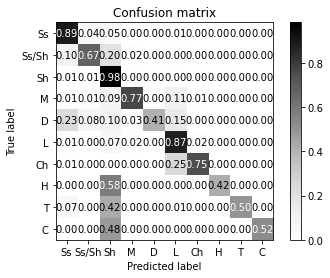

In [57]:
clf_RF = ensemble.RandomForestClassifier(n_estimators=2000, criterion='gini')
#print(cross_val_score(clf_RF, X1_train, y1_train, cv=5))
clf_RF.fit(X1_train, y1_train)
preds_RF = clf_RF.predict(X1_test)
print(classification_report(y1_test, preds_RF))
cm_test_RF = confusion_matrix(y1_test, preds_RF)
plot_confusion_matrix(cm_test_RF, training_features, normalize=True)

In [58]:
microF1_test_rf = f1_score(y1_test, preds_RF, average='micro')
print('Test Macro f1 score:', microF1_test_rf)

Test Macro f1 score: 0.9167521367521367


Random forest blind predction

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-p

              precision    recall  f1-score   support

           1       0.79      0.47      0.59      1237
           2       0.16      0.23      0.19       264
           3       0.79      1.00      0.88      5670
           4       0.58      0.32      0.41       905
           5       0.00      0.00      0.00         0
           6       0.92      0.58      0.71      1277
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00       168

    accuracy                           0.76      9596
   macro avg       0.36      0.29      0.31      9596
weighted avg       0.75      0.76      0.74      9596

Normalized confusion matrix


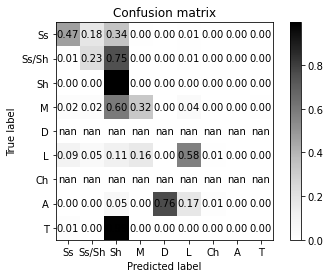

In [59]:
list_blind_full = ['Ss',
                  'Ss/Sh',
                  'Sh',
                  'M',
                   'D',
                  'L',
                  'Ch',
                  'A',
                  'T']

preds_RF_blind = clf_RF.predict(X_blind)
print(classification_report(y_blind, preds_RF_blind))
cm_RF = confusion_matrix(y_blind, preds_RF_blind)
plot_confusion_matrix(cm_RF, list_blind_full, normalize=True)

In [60]:
microF1_blind_rf = f1_score(y_blind, preds_RF_blind, average='micro')
print('Test Micro f1 score:', microF1_blind_rf)

Test Micro f1 score: 0.7616715298040851


### 9.4. KNN Parameter optimzation

In [61]:
# neighbor_list = [5, 7, 10]
# weight_list = ['uniform', 'distance']
# i=0

# for weight in weight_list:
    
    
#     scores = list()
#     score_tests = list()
#     i = i + 1
    
#     for neighbor in neighbor_list:
#         clf_cv = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
#         clf_cv.fit(X1_train, y1_train)
#         scores.append(clf_cv.score(X1_train, y1_train))
#         score_tests.append(clf_cv.score(X1_test, y1_test))
#         print(scores)
        
#     plt.subplot(1,3,i)
#     plt.plot(neighbor_list, scores, 'b')
#     plt.plot(neighbor_list, score_tests, 'r')
#     plt.title('Weight = {}'.format(weight))
#     plt.xlabel('Number of neighbors')
#     plt.ylabel('Accuracy')
#     plt.ylim(0,1.1)
# plt.show()

Using weight has a better KNN modeling score.

KNN classifer training

In [62]:
clf_knn = KNeighborsClassifier(weights='distance')
print(cross_val_score(clf_knn, X1_train, y1_train, cv=5))

[0.83646724 0.84877493 0.84136752 0.84615385 0.84307692]


              precision    recall  f1-score   support

           1       0.76      0.72      0.74      3571
           2       0.58      0.51      0.54      1652
           3       0.92      0.95      0.94     17693
           4       0.65      0.60      0.62      1147
           5       0.65      0.33      0.44        39
           6       0.82      0.80      0.81      3880
           7       0.69      0.68      0.68       873
           8       1.00      0.08      0.15        12
          10       0.47      0.32      0.38       362
          11       0.77      0.48      0.59        21

    accuracy                           0.85     29250
   macro avg       0.73      0.55      0.59     29250
weighted avg       0.84      0.85      0.85     29250

Normalized confusion matrix


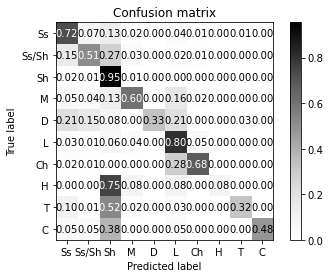

In [63]:
clf_knn = KNeighborsClassifier(weights='distance')
clf_knn.fit(X1_train, y1_train)
preds_knn = clf_knn.predict(X1_test)

print(classification_report(y1_test, preds_knn))
cm_test_knn = confusion_matrix(y1_test, preds_knn)
plot_confusion_matrix(cm_test_knn, training_features, normalize=True)

In [64]:
microF1_test_knn = f1_score(y1_test, preds_knn, average='micro')
print('Test Macro f1 score:', microF1_test_knn)

Test Macro f1 score: 0.8495726495726496


KNN blind well prediction

              precision    recall  f1-score   support

           1       0.57      0.18      0.27      1237
           2       0.12      0.17      0.14       264
           3       0.76      0.99      0.86      5670
           4       0.63      0.38      0.47       905
           5       0.00      0.00      0.00         0
           6       0.91      0.58      0.70      1277
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        75
          10       0.49      0.12      0.19       168

    accuracy                           0.73      9596
   macro avg       0.35      0.24      0.26      9596
weighted avg       0.72      0.73      0.69      9596

Normalized confusion matrix


C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-p

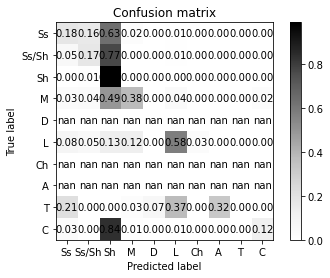

In [65]:
list_blind_rf = ['Ss',
              'Ss/Sh',
              'Sh',
              'M',
                 'D',
                 'L',
                 'Ch',
                 'A','T','C']


preds_knn_blind = clf_knn.predict(X_blind)
print(classification_report(y_blind, preds_knn_blind))
cm_knn = confusion_matrix(y_blind, preds_knn_blind)
plot_confusion_matrix(cm_knn, list_blind_rf, normalize=True)

In [66]:
microF1_blind_knn = f1_score(y_blind, preds_knn_blind, average='micro')
print('Test Macro f1 score:', microF1_blind_knn)

Test Macro f1 score: 0.7279074614422676


### 9.5 CNN

In [67]:
import random
import numpy as np
import tensorflow as tf
random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)
from tensorflow import keras
import pandas as pd


print(tf.__version__)

2.3.0


In [68]:
print(X_train.shape)
print(X_train[1].shape)
print(X_train[0])

(43875, 7)
(7,)
[-0.09386429 -0.04507456 -0.94445366  0.73054213  1.35983754  1.1198124
 -0.63911073]


In [69]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (43875, 7, 1)
1 Sample shape:
 (7, 1)
An example sample:
 [[-0.09386429]
 [-0.04507456]
 [-0.94445366]
 [ 0.73054213]
 [ 1.35983754]
 [ 1.1198124 ]
 [-0.63911073]]


In [70]:
test_data_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [71]:
test_data_reshaped.shape

(29250, 7, 1)

In [72]:
def build_conv1D_model():

    n_timesteps = train_data_reshaped.shape[1] #
    n_features  = train_data_reshaped.shape[2] # 
       
    
    model = keras.Sequential(name="model_conv1D")
    
    # 1st layer
    ks = 2
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_1"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_2"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_3"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(filters=200, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_4"))
    model.add(keras.layers.MaxPooling1D(pool_size=1))
    
    #model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D_fisrt"))
    
    # Dense
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(12, activation='softmax'))


    optimizer_aux = tf.keras.optimizers.Adam()
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer_aux ,metrics = ['accuracy'])
    
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()


Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 6, 200)            600       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 200)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 5, 200)            80200     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 200)            0         
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 4, 200)            80200     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 200)            0         
_________________________________________________________________
Conv1D_4 (Conv1D)            (None, 3, 200)           

In [73]:
earlystoping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                patience=5,
                                                verbose=1,
                                                mode='auto',
                                                restore_best_weights=True)
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                      save_weights_only=True,
                                                      monitor='val_accuracy',
                                                      mode='max',
                                                      verbose=1,
                                                      save_best_only=True)

In [74]:
history_cnn = model_conv1D.fit(train_data_reshaped, y_train, validation_data = (test_data_reshaped,y_test),
                           batch_size = 512, 
                           callbacks = [model_checkpoint,earlystoping],
                           epochs = 1000,
                           verbose=1)

Epoch 1/1000
85/86 [============================>.] - ETA: 0s - loss: 0.9938 - accuracy: 0.7247
Epoch 00001: val_accuracy improved from -inf to 0.78373, saving model to weights.01-0.68.h5
86/86 [==============================] - 4s 46ms/step - loss: 0.9919 - accuracy: 0.7250 - val_loss: 0.6758 - val_accuracy: 0.7837
Epoch 2/1000
85/86 [============================>.] - ETA: 0s - loss: 0.6253 - accuracy: 0.7960
Epoch 00002: val_accuracy improved from 0.78373 to 0.81053, saving model to weights.02-0.56.h5
86/86 [==============================] - 4s 43ms/step - loss: 0.6251 - accuracy: 0.7959 - val_loss: 0.5648 - val_accuracy: 0.8105
Epoch 3/1000
85/86 [============================>.] - ETA: 0s - loss: 0.5606 - accuracy: 0.8087
Epoch 00003: val_accuracy improved from 0.81053 to 0.81720, saving model to weights.03-0.54.h5
86/86 [==============================] - 4s 42ms/step - loss: 0.5609 - accuracy: 0.8085 - val_loss: 0.5420 - val_accuracy: 0.8172
Epoch 4/1000
85/86 [====================

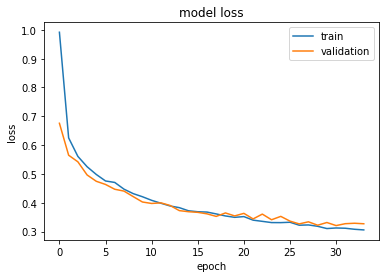

In [75]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])


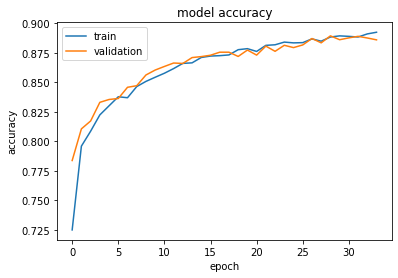

In [76]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

In [77]:
pred_test_cnn = model_conv1D.predict(test_data_reshaped)

In [78]:
pred_test_cnn = tf.argmax(pred_test_cnn, axis=1)

In [79]:
test_loss, test_acc = model_conv1D.evaluate(test_data_reshaped,  y_test, verbose=2)

915/915 - 2s - loss: 0.3218 - accuracy: 0.8893


              precision    recall  f1-score   support

          Ss       0.85      0.85      0.85      3571
       Ss/Sh       0.69      0.57      0.62      1652
          Sh       0.93      0.97      0.95     17693
           M       0.74      0.77      0.75      1147
           D       0.68      0.49      0.57        39
           L       0.88      0.81      0.84      3880
          Ch       0.73      0.71      0.72       873
           H       0.89      0.67      0.76        12
           T       0.70      0.43      0.53       362
           C       0.82      0.43      0.56        21

    accuracy                           0.89     29250
   macro avg       0.79      0.67      0.72     29250
weighted avg       0.89      0.89      0.89     29250

Normalized confusion matrix


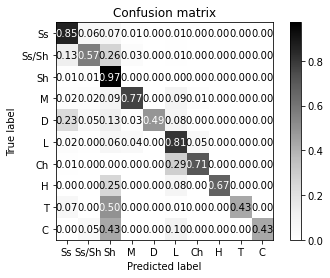

In [80]:
print(classification_report(y_test, pred_test_cnn, target_names=training_features))
cm_test_cnn = confusion_matrix(y_test, pred_test_cnn)
plot_confusion_matrix(cm_test_cnn, training_features, normalize=True)

In [81]:
microF1_test_cnn = f1_score(y_test, pred_test_cnn, average='micro')
print('Test Macro f1 score:', microF1_test_cnn)

Test Macro f1 score: 0.8892991452991453


In [82]:
X_blind_reshaped = X_blind_stnd.reshape(X_blind_stnd.shape[0],X_blind_stnd.shape[1],1)
X_blind_reshaped.shape

(9596, 7, 1)

In [83]:
aux = model_conv1D.predict(X_blind_reshaped)

In [84]:
pred_blind_cnn = tf.argmax(aux, axis=1)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-p

              precision    recall  f1-score   support

           1       0.85      0.48      0.61      1237
           2       0.17      0.28      0.21       264
           3       0.80      0.99      0.88      5670
           4       0.51      0.36      0.42       905
           5       0.00      0.00      0.00         0
           6       0.88      0.52      0.65      1277
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        75
          10       0.67      0.02      0.05       168

    accuracy                           0.76      9596
   macro avg       0.43      0.29      0.31      9596
weighted avg       0.76      0.76      0.73      9596

Normalized confusion matrix


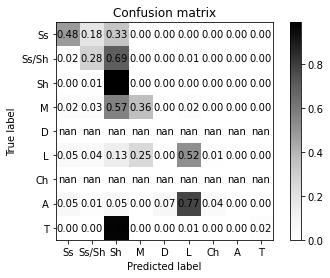

In [85]:
print(classification_report(y_blind, pred_blind_cnn))
cm_cnn = confusion_matrix(y_blind, pred_blind_cnn)
plot_confusion_matrix(cm_cnn, list_blind_full, normalize=True)

In [86]:
microF1_blind_cnn = f1_score(y_blind, pred_blind_cnn, average='micro')
print('Test Macro f1 score:', microF1_blind_cnn)

Test Macro f1 score: 0.7573989162150896


### 9.6 CNN (RBF)

In [87]:
import keras
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, ** kwargs):
        super(RBFLayer, self).__init__( ** kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name = 'mu',
                                  shape = (int(input_shape[1]), self.units),
                                  initializer = 'uniform',
                                  trainable = True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis = 1)
        res = K.exp(-1 * self.gamma * l2)
        return res
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [88]:
def build_conv1D_rbf_model():

    n_timesteps = train_data_reshaped.shape[1] #
    n_features  = train_data_reshaped.shape[2] # 
       
    
    model_rbf = keras.Sequential(name="model_conv1D_rbf")
    
    # 1st layer
    ks = 1
    filt=7
    model_rbf.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    model_rbf.add(keras.layers.Conv1D(filters=filt, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_1"))
    model_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    model_rbf.add(keras.layers.Conv1D(filters=filt, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_2"))
    model_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    model_rbf.add(keras.layers.Conv1D(filters=filt, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_3"))
    model_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    model_rbf.add(keras.layers.Conv1D(filters=filt, kernel_size=ks, strides=1, padding='valid', activation='relu', name="Conv1D_4"))
    model_rbf.add(keras.layers.MaxPooling1D(pool_size=1))
    model_rbf.add(RBFLayer(10,1))
   
    #model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D_fisrt"))
    
    # Dense
    
    model_rbf.add(keras.layers.Flatten())
    model_rbf.add(keras.layers.Dropout(0.2))
    model_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_rbf.add(keras.layers.Dense(50, activation='relu'))
    model_rbf.add(keras.layers.Dense(12, activation='softmax'))


    optimizer_aux = tf.keras.optimizers.Adam()
    model_rbf.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer_aux ,metrics = ['accuracy'])
    
    return model_rbf

model_conv1D_rbf = build_conv1D_rbf_model()
model_conv1D_rbf.summary()


Model: "model_conv1D_rbf"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 7, 7)              14        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 7, 7)              0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 7, 7)              56        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 7, 7)              0         
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 7, 7)              56        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 7)              0         
_________________________________________________________________
Conv1D_4 (Conv1D)            (None, 7, 7)         

In [89]:
history_rbf = model_conv1D_rbf.fit(train_data_reshaped, y_train, validation_data = (test_data_reshaped,y_test),
                           batch_size = 512, 
                           callbacks = [model_checkpoint,earlystoping],
                           epochs = 1000,
                           verbose=1)

Epoch 1/1000
86/86 [==============================] - ETA: 0s - loss: 1.4320 - accuracy: 0.5628
Epoch 00001: val_accuracy did not improve from 0.88930
86/86 [==============================] - 1s 15ms/step - loss: 1.4320 - accuracy: 0.5628 - val_loss: 1.0838 - val_accuracy: 0.6623
Epoch 2/1000
86/86 [==============================] - ETA: 0s - loss: 0.9733 - accuracy: 0.7050
Epoch 00002: val_accuracy did not improve from 0.88930
86/86 [==============================] - 1s 14ms/step - loss: 0.9733 - accuracy: 0.7050 - val_loss: 0.8357 - val_accuracy: 0.7509
Epoch 3/1000
86/86 [==============================] - ETA: 0s - loss: 0.8368 - accuracy: 0.7463
Epoch 00003: val_accuracy did not improve from 0.88930
86/86 [==============================] - 1s 14ms/step - loss: 0.8368 - accuracy: 0.7463 - val_loss: 0.7656 - val_accuracy: 0.7698
Epoch 4/1000
86/86 [==============================] - ETA: 0s - loss: 0.7905 - accuracy: 0.7566
Epoch 00004: val_accuracy did not improve from 0.88930
86/86 

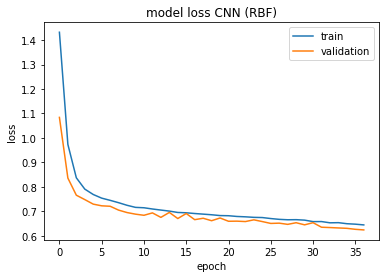

In [90]:
plt.plot(history_rbf.history['loss'])
plt.plot(history_rbf.history['val_loss'])
plt.title('model loss CNN (RBF)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])


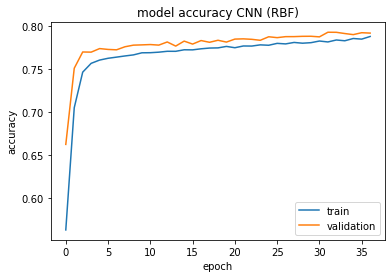

In [91]:
plt.plot(history_rbf.history['accuracy'])
plt.plot(history_rbf.history['val_accuracy'])
plt.title('model accuracy CNN (RBF)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

In [92]:
pred_test_rbf = model_conv1D_rbf.predict(test_data_reshaped)

In [93]:
pred_test_rbf = tf.argmax(pred_test_rbf, axis=1)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.62      0.71      0.66      3571
           2       0.45      0.19      0.27      1652
           3       0.88      0.97      0.92     17693
           4       0.44      0.07      0.12      1147
           5       0.00      0.00      0.00        39
           6       0.66      0.79      0.72      3880
           7       0.40      0.04      0.08       873
           8       0.00      0.00      0.00        12
          10       0.00      0.00      0.00       362
          11       0.00      0.00      0.00        21

    accuracy                           0.79     29250
   macro avg       0.35      0.28      0.28     29250
weighted avg       0.75      0.79      0.76     29250

Normalized confusion matrix


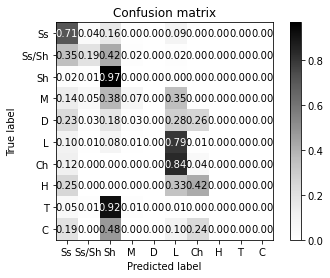

In [94]:
print(classification_report(y_test, pred_test_rbf))
cm_test_rbf = confusion_matrix(y_test, pred_test_rbf)
plot_confusion_matrix(cm_test_rbf, training_features, normalize=True)

In [95]:
microF1_test_rbf = f1_score(y_test, pred_test_rbf, average='micro')
print('Test Macro f1 score:', microF1_test_rbf)

Test Macro f1 score: 0.7927863247863248


In [96]:
pred_blind_rbf = model_conv1D_rbf.predict(X_blind_reshaped)

In [97]:
pred_blind_rbf = tf.argmax(pred_blind_rbf, axis=1)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-p

              precision    recall  f1-score   support

           1       0.71      0.46      0.55      1237
           2       0.19      0.27      0.22       264
           3       0.77      1.00      0.87      5670
           4       0.36      0.04      0.07       905
           6       0.95      0.66      0.78      1277
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00       168

    accuracy                           0.75      9596
   macro avg       0.37      0.30      0.31      9596
weighted avg       0.71      0.75      0.70      9596

Normalized confusion matrix


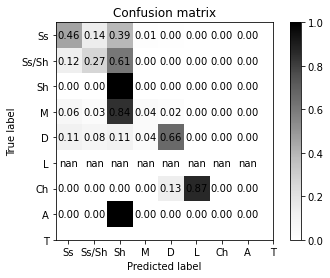

In [98]:
list_blind = ['Ss',
              'Ss/Sh',
              'Sh',
              'M',
              'L',
              'T']

print(classification_report(y_blind, pred_blind_rbf))
cm_rbf = confusion_matrix(y_blind, pred_blind_rbf)
plot_confusion_matrix(cm_rbf, list_blind_full, normalize=True)

### 9.7. MLP

In [99]:
from sklearn.neural_network import MLPClassifier

In [100]:
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(50,50)).fit(X_train, y_train)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
pred_mlp_test = mlp.predict(X_test)

              precision    recall  f1-score   support

          Ss       0.85      0.84      0.85      3571
       Ss/Sh       0.66      0.59      0.62      1652
          Sh       0.94      0.96      0.95     17693
           M       0.75      0.67      0.71      1147
           D       0.58      0.28      0.38        39
           L       0.80      0.85      0.82      3880
          Ch       0.72      0.57      0.64       873
           H       0.89      0.67      0.76        12
           T       0.62      0.50      0.55       362
           C       0.84      0.76      0.80        21

    accuracy                           0.88     29250
   macro avg       0.77      0.67      0.71     29250
weighted avg       0.88      0.88      0.88     29250

Normalized confusion matrix


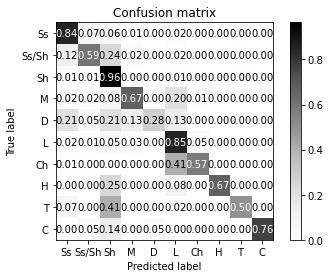

In [102]:
print(classification_report(y_test, pred_mlp_test, target_names=training_features))
cm_test_MLP = confusion_matrix(y_test, pred_mlp_test)
plot_confusion_matrix(cm_test_MLP, training_features, normalize=True)

In [103]:
microF1_test_mlp = f1_score(y_test, pred_mlp_test, average='micro')
print('Test Macro f1 score:', microF1_test_mlp)

Test Macro f1 score: 0.8821538461538462


              precision    recall  f1-score   support

           1       0.92      0.54      0.68      1237
           2       0.14      0.17      0.16       264
           3       0.82      0.98      0.89      5670
           4       0.76      0.47      0.58       905
           6       0.86      0.74      0.79      1277
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        75
          10       0.42      0.03      0.06       168
          11       0.00      0.00      0.00         0

    accuracy                           0.80      9596
   macro avg       0.43      0.33      0.35      9596
weighted avg       0.80      0.80      0.78      9596

Normalized confusion matrix


C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-p

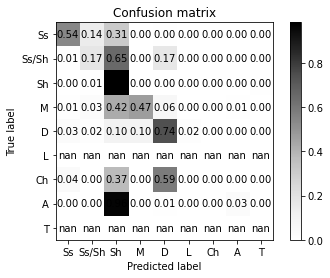

In [104]:
pred_mlp_blind = mlp.predict(X_blind_stnd)
print(classification_report(y_blind, pred_mlp_blind))
cm_mlp = confusion_matrix(y_blind, pred_mlp_blind)
plot_confusion_matrix(cm_mlp, list_blind_full, normalize=True)

# 10. Model performance evaluation

I will use the diagnosis of confusion matrix from train data set to evaluate the model performance. The diagnosis of confusion matrix points how much percentage of the stone is correctly predicted.

In [105]:
### To create a data frame recording the correct prediction (normalized) of 
### facies for each machine learning algorithm

mod_test_list = ['SVM', 'GB', 'RF','KNN','CNN','CNN-RBF','MLP']
cm_test_list = [cm_test_SVM, cm_test_GB, cm_test_RF, cm_test_knn,cm_test_cnn, cm_test_rbf, cm_test_MLP]
face_test_list = training_features
pred_test_df = pd.DataFrame(index=training_features, columns=mod_test_list)

for mod in mod_test_list:
    
    col_index = int(mod_test_list.index(mod))
    cm = cm_test_list[col_index]
    
    for face in face_test_list:
        row_index = training_features.index(face)
        #print(face, row_index, col_index)
        pred_test_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])
        

### add the accuracy factor
df_1 = pd.DataFrame([[microF1_test_SVM, 
                      microF1_test_gb, 
                      microF1_test_rf, 
                      microF1_test_knn, 
                      microF1_test_cnn, 
                      microF1_test_rbf, 
                      microF1_test_mlp]], index=['Accuracy'], columns=mod_test_list)    


pred_test_conc = pd.concat([pred_test_df,df_1])
pred_test_conc

### To create a data frame recording the correct prediction (normalized) of 
### facies for each machine learning algorithm

#mod_test_list = ['SVM', 'GB', 'RF','KNN']
#cm_test_list = [cm_test_SVM, cm_test_GB, cm_test_RF, cm_test_knn]
#face_test_list = ['Sandstone','Sandstone/Shale','Shale','Marl','Dolomite','Limestone','Chalk']
#pred_test_df = pd.DataFrame(index=target_list, columns=mod_test_list)

#for mod in mod_test_list:
#    
#    col_index = int(mod_test_list.index(mod))
#    cm = cm_test_list[col_index]
#    
#    for face in face_test_list:
#        row_index = target_list.index(face)
#        #print(face, row_index, col_index)
#        pred_test_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])
        

### add the accuracy factor
#df_1 = pd.DataFrame([[0.94, 0.93, 0.94, 0.93]], index=['Accuracy'], columns=mod_test_list)    
#pred_test_df = pred_test_df.append(df_1)

#print(pred_test_df.head(10))

,SVM,GB,RF,KNN,CNN,CNN-RBF,MLP
Ss,0.83646,0.8303,0.891627,0.721367,0.853542,0.709885,0.840381
Ss/Sh,0.607143,0.574455,0.673729,0.509685,0.572034,0.191283,0.591404
Sh,0.97581,0.971571,0.982705,0.954728,0.972079,0.968632,0.964336
M,0.723627,0.658239,0.767219,0.600697,0.768091,0.069747,0.666957
D,0.487179,0.333333,0.410256,0.333333,0.487179,0.0,0.282051
L,0.851031,0.837629,0.872938,0.803866,0.807216,0.794588,0.845619
Ch,0.593356,0.66323,0.745704,0.676976,0.706758,0.042383,0.573883
H,0.5,0.583333,0.416667,0.083333,0.666667,0.0,0.666667
T,0.40884,0.430939,0.5,0.323204,0.425414,0.0,0.5
C,0.619048,0.47619,0.52381,0.47619,0.428571,0.0,0.761905


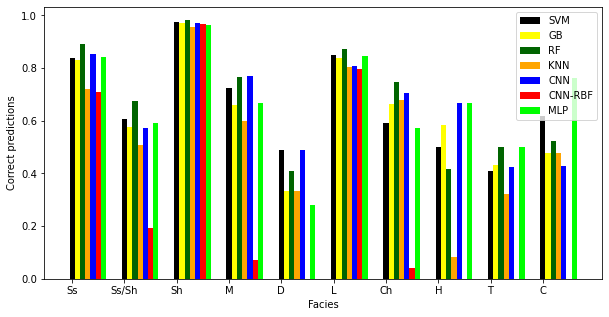

In [106]:
X_ind = np.arange(pred_test_df.shape[0])
(pred_df_index_list) = training_features
aux=0.1
plt.figure(figsize=(10,5))
plt.bar(X_ind, pred_test_df['SVM'], color='k', width=aux)
plt.bar(X_ind+0.1, pred_test_df['GB'], color='yellow', width=aux)
plt.bar(X_ind+0.2, pred_test_df['RF'], color='darkgreen', width=aux)
plt.bar(X_ind+0.3, pred_test_df['KNN'], color='orange', width=aux)
plt.bar(X_ind+0.4, pred_test_df['CNN'], color='blue', width=aux)
plt.bar(X_ind+0.5, pred_test_df['CNN-RBF'], color='red', width=aux)
plt.bar(X_ind+0.6, pred_test_df['MLP'], color='lime', width=aux)
plt.xticks(X_ind, pred_df_index_list)
plt.xlabel('Facies')
plt.ylabel('Correct predictions')
plt.legend(labels=mod_test_list)
plt.savefig('canada_performance_evaluation_test_data.pdf',bbox_inches='tight')
plt.show()

# 11. Calssifier evluation using blind test well

I will use the same method shown in item4 for evaluation.

In [108]:
### To create a data frame recording the correct prediction (normalized) of facies of blind test well for each machine learning algorithm

blind_class  = ['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Limestone',
                  'Chalk',
                  'Anhydrite',
                  'Tuff']

mod_list = ['SVM', 'GB', 'RF','KNN','CNN','CNN-RBF','MLP']
cm_list = [cm_SVM, cm_GB, cm_RF, cm_knn, cm_cnn, cm_rbf, cm_mlp]
pred_df = pd.DataFrame(index=blind_class, columns=mod_list)

for mod in mod_list:
    col_index = int(mod_list.index(mod))
    cm = cm_list[col_index]
    
    for face in blind_class:
        
        row_index = blind_class.index(face)
        #print(face, row_index, col_index)
        pred_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])



C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_9444/534116533.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  pred_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])


In [112]:
blind

,WELL,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF,FACIES,LITH,LITH_SI
123313,16/2-16,705.550396,1.340541,1.364968,2.125565,122.600769,0.472988,157.843994,4.017347,65000,Shale,3
123314,16/2-16,705.702396,1.344673,1.366519,2.126764,126.172905,0.476745,157.064499,3.816923,65000,Shale,3
123315,16/2-16,705.854396,1.355193,1.377351,2.131069,131.125244,0.459273,156.237564,3.770154,65000,Shale,3
123316,16/2-16,706.006396,1.366960,1.377473,2.140570,129.771545,0.444680,155.374191,3.732529,65000,Shale,3
123317,16/2-16,706.158396,1.385934,1.404746,2.151072,123.866241,0.428803,154.711121,3.577061,65000,Shale,3
...,...,...,...,...,...,...,...,...,...,...,...,...
133119,16/2-16,2196.062396,5.016001,4.727455,2.537510,132.450317,0.112312,70.126060,3.663386,30000,Sandstone,1
133120,16/2-16,2196.214396,4.574865,4.421765,2.526997,131.869812,0.116130,70.316216,3.629687,30000,Sandstone,1
133121,16/2-16,2196.366396,4.761734,4.535498,2.520570,127.004021,0.120230,70.462158,3.615547,30000,Sandstone,1
133122,16/2-16,2196.518396,5.035505,4.870131,2.523459,124.698349,0.126182,70.337593,3.594654,30000,Sandstone,1


In [117]:
preds_knn_blind

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

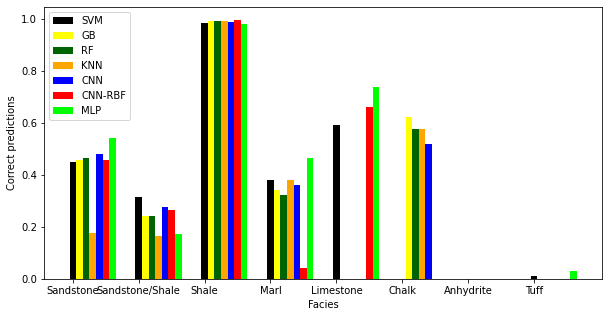

In [110]:
X_ind = np.arange(pred_df.shape[0])

aux=0.1
plt.figure(figsize=(10,5))
plt.bar(X_ind, pred_df['SVM'], color='k', width=aux)
plt.bar(X_ind+0.1, pred_df['GB'], color='yellow', width=aux)
plt.bar(X_ind+0.2, pred_df['RF'], color='darkgreen', width=aux)
plt.bar(X_ind+0.3, pred_df['KNN'], color='orange', width=aux)
plt.bar(X_ind+0.4, pred_df['CNN'], color='blue', width=aux)
plt.bar(X_ind+0.5, pred_df['CNN-RBF'], color='red', width=aux)
plt.bar(X_ind+0.6, pred_df['MLP'], color='lime', width=aux)
plt.xticks(X_ind, blind_class)
plt.xlabel('Facies')
plt.ylabel('Correct predictions')
plt.legend(labels=mod_list)
plt.savefig('canada_performance_evaluation_blind_data.pdf',bbox_inches='tight')
plt.show()

# 12. Plot the predicted facies for comparison**

In [107]:
blind = blind.copy()
blind['SVM'] = pred_blind
blind['GB'] = pred_GB_blind
blind['RF'] = preds_RF_blind
blind['KNN'] = preds_knn_blind
blind['CNN'] = pred_blind_cnn
blind['RBF'] = pred_blind_rbf
blind['MLP'] = pred_mlp_blind

blind.head()

,WELL,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,PEF,FACIES,LITH,LITH_SI,SVM,GB,RF,KNN,CNN,RBF,MLP
123313,16/2-16,705.550396,1.340541,1.364968,2.125565,122.600769,0.472988,157.843994,4.017347,65000,Shale,3,3,1,3,3,3,3,3
123314,16/2-16,705.702396,1.344673,1.366519,2.126764,126.172905,0.476745,157.064499,3.816923,65000,Shale,3,3,3,3,3,3,3,3
123315,16/2-16,705.854396,1.355193,1.377351,2.131069,131.125244,0.459273,156.237564,3.770154,65000,Shale,3,3,3,3,3,3,3,3
123316,16/2-16,706.006396,1.366960,1.377473,2.140570,129.771545,0.444680,155.374191,3.732529,65000,Shale,3,3,3,3,3,3,3,3
123317,16/2-16,706.158396,1.385934,1.404746,2.151072,123.866241,0.428803,154.711121,3.577061,65000,Shale,3,3,3,3,3,3,3,3


In [179]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

facies_colors = ['bisque',
                 'darkorange',
                 'darkgoldenrod',
                 'peachpuff',
                 'beige',
                 'honeydew',
                 'white','red']

blind_class  = ['Ss',
                  'Ss/Sh',
                  'Sh',
                  'M',
                  'L',
                  'Ch',
                  'A',
                  'T']

def compare_facies_plot(logs, compare1, compare2, compare3, compare4, compare5, compare6, compare7, facies_colors):
      #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH_MD')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    num_colors = 8
    ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
    
    cluster0 = np.repeat(np.expand_dims(logs['LITH_SI'].values,1), 100, 1)
    cluster1 = np.repeat(np.expand_dims(logs[compare1].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compare2].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compare3].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[compare4].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[compare5].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[compare6].values,1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[compare7].values,1), 100, 1)
    
    
    f, ax = plt.subplots(nrows=1, ncols=15, figsize=(18, 15))
    ax[0].plot(logs.RMED, logs.DEPTH_MD, '-g')
    ax[1].plot(logs.RDEP, logs.DEPTH_MD, '-')
    ax[2].plot(logs.RHOB, logs.DEPTH_MD, '-', color='0.5')
    ax[3].plot(logs.GR, logs.DEPTH_MD, '-', color='r')
    ax[4].plot(logs.NPHI, logs.DEPTH_MD, '-', color='black')
    ax[5].plot(logs.DTC, logs.DEPTH_MD, '-', color='black')
    ax[6].plot(logs.PEF, logs.DEPTH_MD, '-', color='black')
    im0 = ax[7].imshow(cluster0, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im1 = ax[8].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im2 = ax[9].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im3 = ax[10].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[11].imshow(cluster4, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[12].imshow(cluster5, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[13].imshow(cluster6, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    im4 = ax[14].imshow(cluster7, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=num_colors)
    
            
    divider = make_axes_locatable(ax[14])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im4, cax=cax)
    cbar.set_label((30*' ').join(blind_class))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("RMED")
    ax[0].set_xlim(logs.RMED.min(),logs.RMED.max())
    
    ax[1].set_xlabel("RDEP")
    ax[1].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    
    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    
    ax[3].set_xlabel("GR")
    ax[3].set_xlim(logs.GR.min(),logs.GR.max())
    
    ax[4].set_xlabel("NPHI")
    ax[4].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    
    ax[5].set_xlabel("DTC")
    ax[5].set_xlim(logs.DTC.min(),logs.DTC.max())
    
    ax[6].set_xlabel("PEF")
    ax[6].set_xlim(logs.PEF.min(),logs.PEF.max())
    
    ax[7].set_xlabel('Facies')
    ax[8].set_xlabel(compare1)
    ax[9].set_xlabel(compare2)
    ax[10].set_xlabel(compare3)
    ax[11].set_xlabel(compare4)
    ax[12].set_xlabel(compare5)
    ax[13].set_xlabel(compare6)
    ax[14].set_xlabel(compare7)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[10].set_yticklabels([]); ax[11].set_yticklabels([]); ax[12].set_yticklabels([])
    ax[13].set_yticklabels([]); ax[14].set_yticklabels([])
    
    
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    ax[8].set_xticklabels([])
    ax[9].set_xticklabels([])
    ax[10].set_xticklabels([])
    ax[11].set_xticklabels([])
    ax[12].set_xticklabels([])
    ax[13].set_xticklabels([])
    ax[14].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)

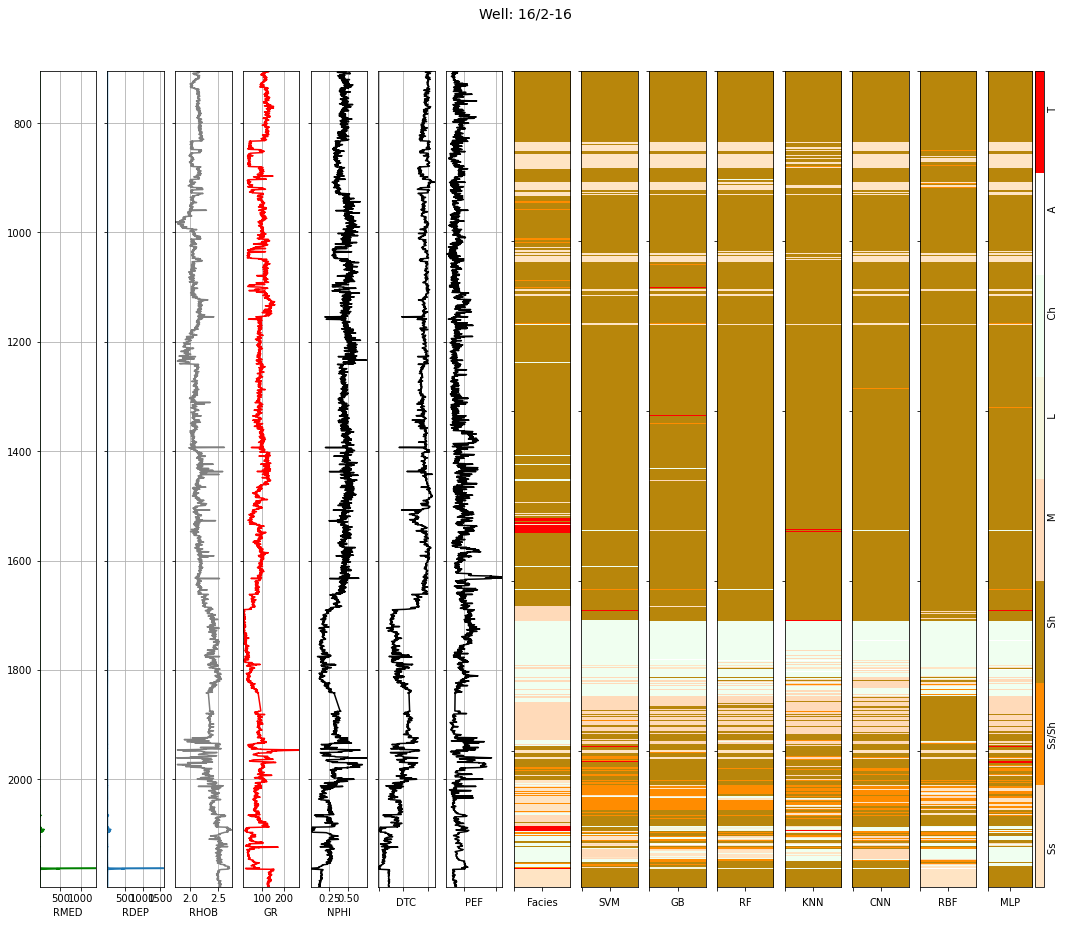

In [180]:
compare_facies_plot(blind, 'SVM', 'GB', 'RF', 'KNN','CNN','RBF','MLP', facies_colors)

In [ ]:
list0 = []
for i in range(0,100,1):
    X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.05)
    clf0 = ensemble.RandomForestClassifier(n_estimators=2000)
    clf0.fit(X_train0, y_train0)
    list0.append(clf0.score(X_test0, y_test0))
    print(i + 1, clf0.score(X_test0, y_test0))